import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split as tts


## Preprocessing


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split as tts
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.manifold import TSNE

## Data preprocessing

Please refer to preprocessing.ipynb for detailed implementation of initial data preprocessing.

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading training data
df_train = pd.read_csv('drive/Shareddrives/AC209A-Project/train_data_final.csv',skipinitialspace=True)

In [ ]:
# reading testing data
df_test = pd.read_csv('drive/Shareddrives/AC209A-Project/test_data_final.csv',skipinitialspace=True)

In [ ]:
# removing unused features 
df_train.drop(['description', 'tracks_trans', 'name', 'pid'], axis = 1, inplace = True)
df_test.drop(['description', 'tracks_trans', 'name', 'pid'], axis = 1, inplace = True)

In [ ]:
df_train = df_train.sample(frac = 0.25, random_state= 2)
df_test = df_test.sample(frac = 0.25, random_state= 2)

In [ ]:
# preprocessing categorical data
df_train['popular'] = 1*(df_train['num_followers']>2)
df_train['collaborative'] = 1*df_train['collaborative']
# df_train.drop('num_followers', axis = 1, inplace = True)
df_test['popular'] = 1*(df_test['num_followers']>2)
df_test['collaborative'] = 1*df_test['collaborative']
# df_test.drop('num_followers', axis = 1, inplace = True)

In [ ]:
# X-y 
X_train = df_train.drop(['popular','avg_duration','num_followers'], axis = 1)
y_train = df_train['popular']
X_test = df_test.drop(['popular','tracks','avg_duration', 'num_followers'], axis = 1)
y_test = df_test['popular']

In [ ]:
# # downsampling the data to get acceptable number of observations
# rs = RandomUnderSampler(random_state = 2, sampling_strategy='all')
# X_train, y_train = rs.fit_resample(X_train, y_train)

In [ ]:
# X_train.to_csv(r'drive/Shareddrives/AC209A-Project/X_train.csv',index=False)
# y_train_df = pd.DataFrame(y_train.values)
# y_test_df = pd.DataFrame(y_test.values)
# X_test.to_csv(r'drive/Shareddrives/AC209A-Project/X_test.csv',index=False)
# y_train.to_csv(r'drive/Shareddrives/AC209A-Project/y_train.csv',index=False)
# y_test.to_csv(r'drive/Shareddrives/AC209A-Project/y_test.csv',index=False)

### Preprocessing--Summary Statistic

In [ ]:
X_train.describe()

,collaborative,modified_at,num_tracks,num_albums,num_edits,duration_ms,num_artists,avg_popularity,avg_danceability,avg_energy,avg_key,avg_loudness,avg_mode,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_temp,avg_time_signature
count,45586.000000,4.558600e+04,45586.000000,45586.000000,45586.000000,4.558600e+04,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000,45586.000000
mean,0.026148,1.478083e+09,77.606634,58.650792,22.401856,1.823688e+07,44.555609,29.522074,0.283802,0.290200,2.366683,-3.240368,0.297768,0.043365,0.101102,0.014959,0.081822,0.234051,54.764220,1.789642
std,0.159578,3.613517e+07,58.097297,44.128957,24.767027,1.391782e+07,33.261474,14.534799,0.140773,0.147698,1.138486,1.715098,0.157685,0.034910,0.078947,0.031995,0.041398,0.133169,25.224393,0.812937
min,0.000000,1.271376e+09,5.000000,2.000000,1.000000,6.150710e+05,3.000000,0.000000,0.000000,0.000000,0.000000,-19.705667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.461715e+09,31.000000,24.000000,6.000000,7.334978e+06,19.000000,18.156250,0.174724,0.175640,1.518316,-4.166403,0.181818,0.018566,0.048353,0.000272,0.051493,0.131914,35.780381,1.181818
50%,0.000000,1.492474e+09,61.000000,46.000000,13.000000,1.410679e+07,36.000000,30.612642,0.292306,0.294786,2.437500,-3.141769,0.292308,0.033619,0.083001,0.003489,0.082493,0.225622,56.956576,1.869565
75%,0.000000,1.506384e+09,110.000000,82.000000,30.000000,2.589374e+07,62.000000,40.844068,0.388454,0.399744,3.187500,-2.081079,0.400000,0.058077,0.131555,0.016690,0.110113,0.324091,74.022235,2.415517
max,1.000000,1.509494e+09,250.000000,239.000000,191.000000,2.160942e+08,225.000000,78.000000,0.850000,0.870167,8.600000,0.000000,1.000000,0.393500,0.733575,0.658825,0.487484,0.827303,146.529000,4.000000


## EDA--Correlation

Text(0.5, 0, 'Number of Followers')

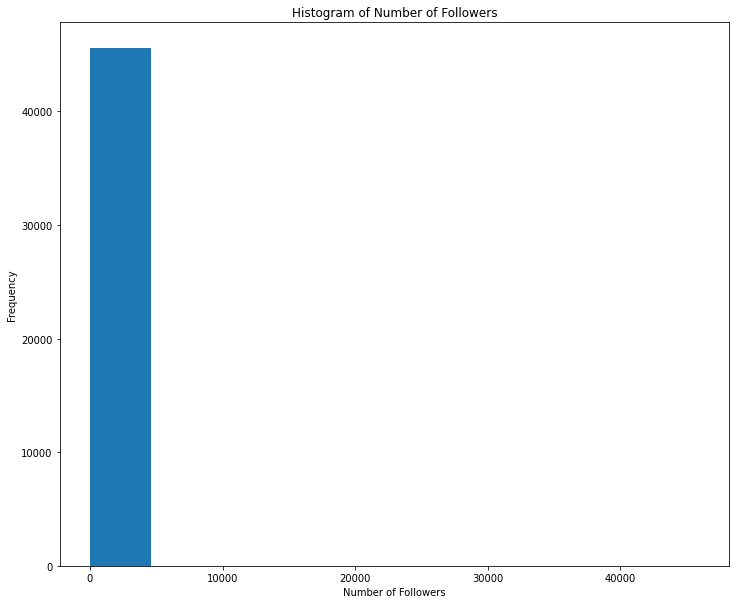

In [ ]:
plt.figure(figsize=(12,10))
plt.hist(df_train['num_followers'])
plt.title("Histogram of Number of Followers")
plt.ylabel("Frequency")
plt.xlabel("Number of Followers")

In [ ]:
old_predictors = ['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists']
new_predictors = [
       'avg_danceability', 'avg_energy', 'avg_key', 'avg_loudness', 'avg_mode',
       'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness',
       'avg_liveness', 'avg_valence', 'avg_temp', 'avg_time_signature']

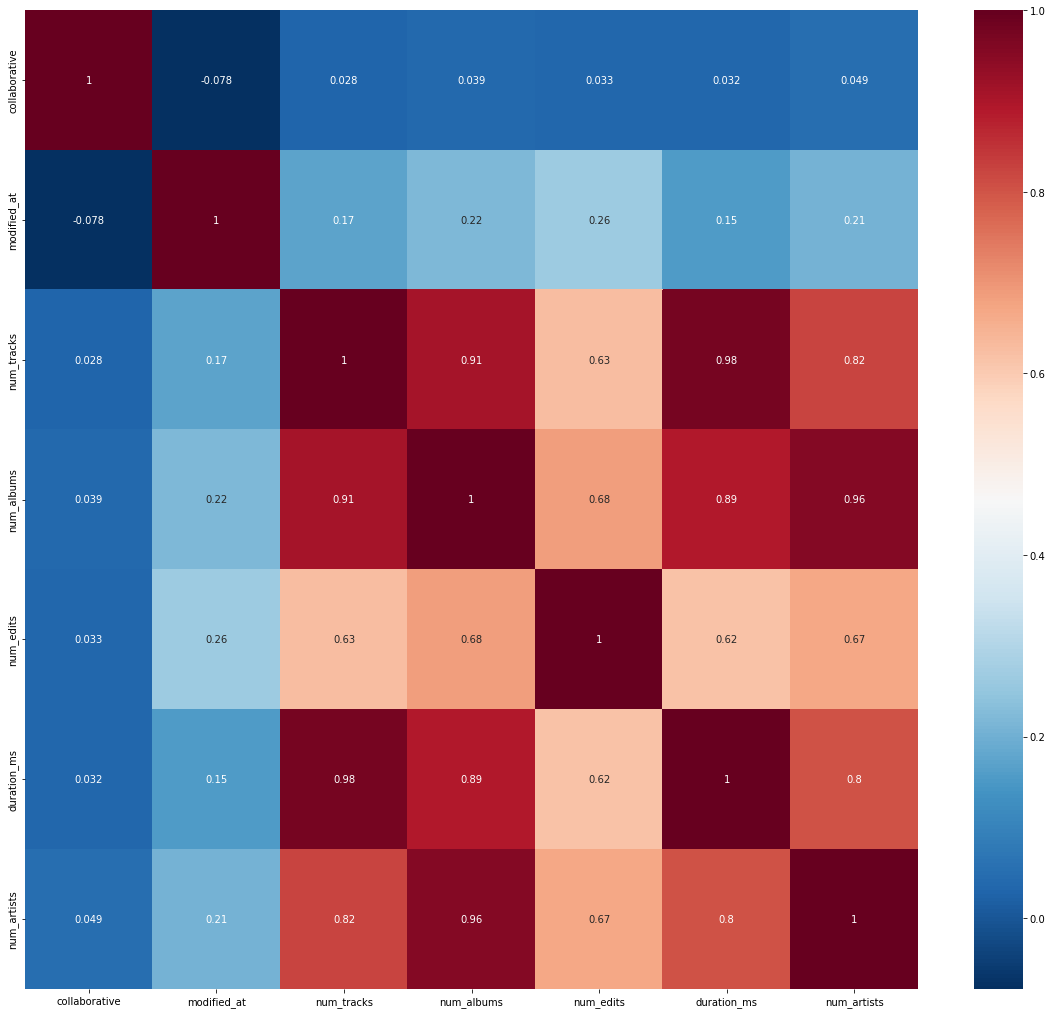

In [ ]:
# old predictors
corr = X_train[old_predictors].corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, cmap="RdBu_r",annot=True)

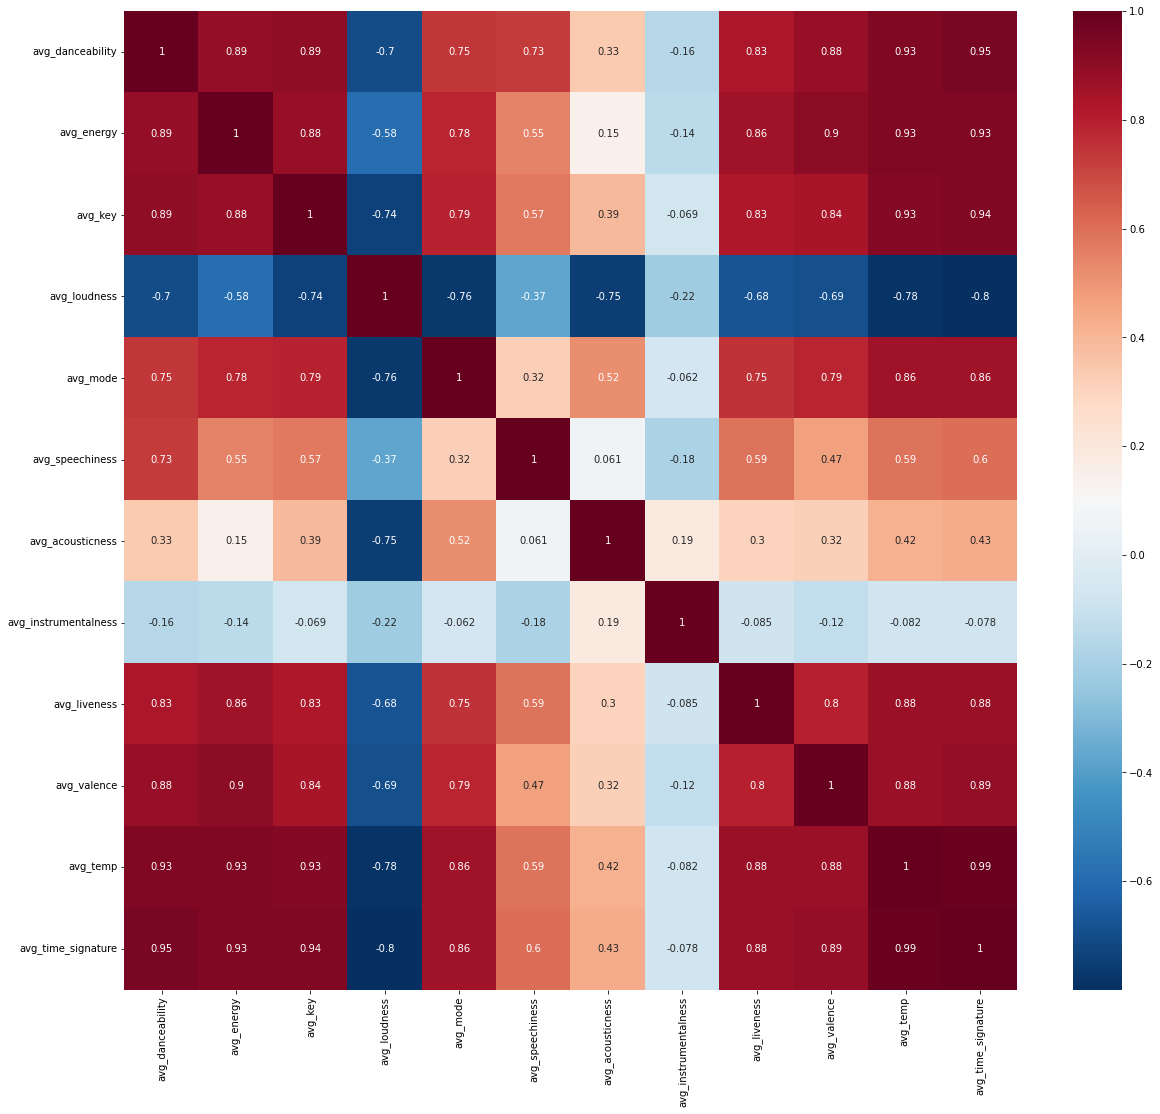

In [ ]:
# new predictors
corr = X_train[new_predictors].corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, cmap="RdBu_r",annot=True)

## EDA -- Feature Distribution

In [ ]:
predictors =['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists', 'avg_popularity',
       'avg_danceability', 'avg_energy', 'avg_key', 'avg_loudness', 'avg_mode',
       'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness',
       'avg_liveness', 'avg_valence', 'avg_temp', 'avg_time_signature']
quant = ['modified_at', 'num_tracks',
       'num_albums',  'num_edits', 'duration_ms',
       'num_artists','avg_popularity', 'avg_danceability', 'avg_energy', 
       'avg_key', 'avg_loudness', 'avg_mode',
       'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness',
       'avg_liveness', 'avg_valence', 'avg_temp', 'avg_time_signature']
cat = ['collaborative']

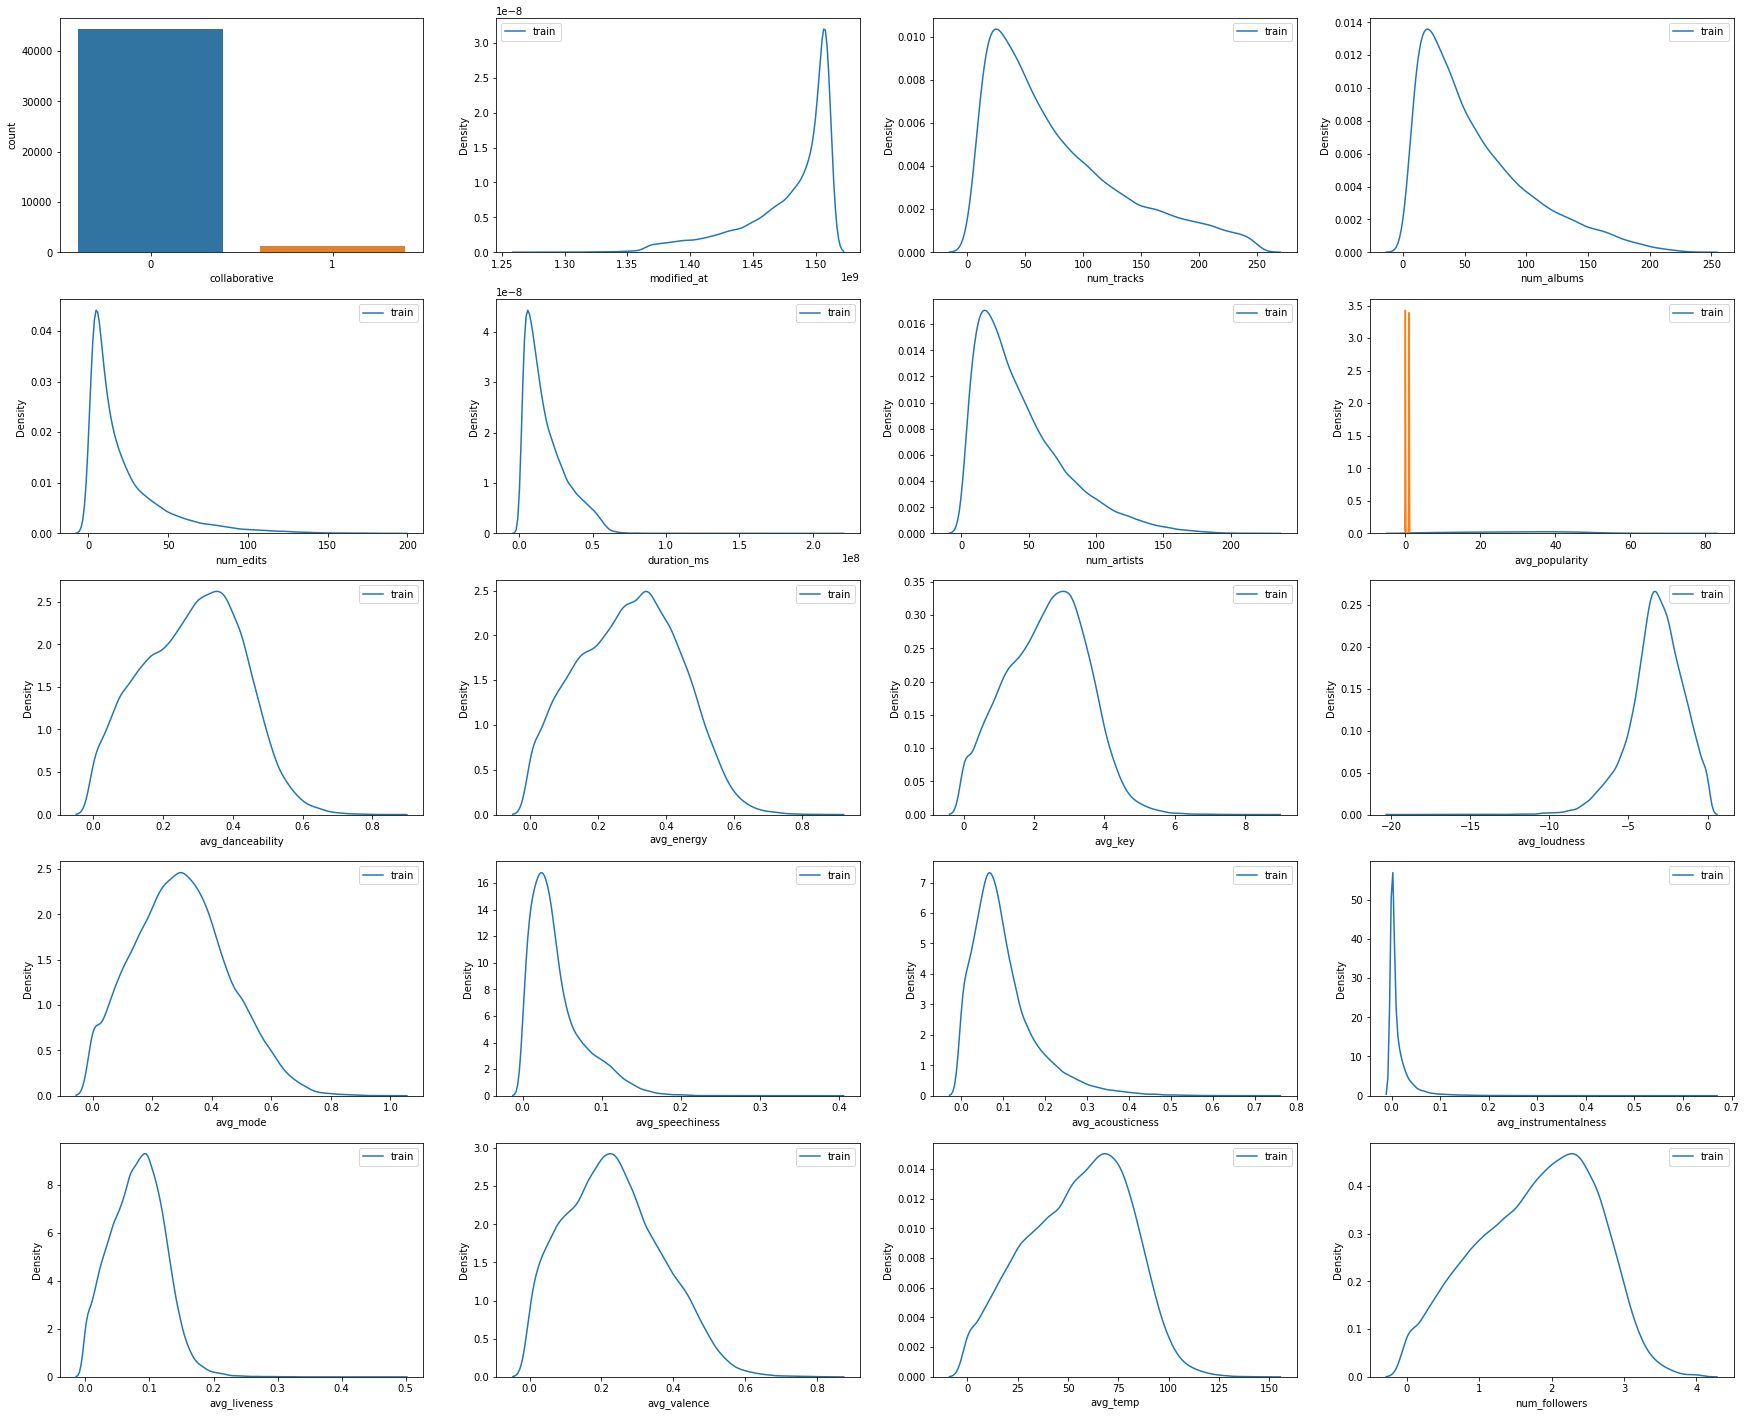

In [ ]:
fig, axs = plt.subplots(5,4,figsize=(30,25))
axs = axs.ravel()
# x distribution
for i, x in enumerate(predictors):
    if x in cat:
      sns.countplot(ax=axs[i],x=x,data=X_train)
      axs[i].set_xlabel(x)
    else:
      sns.kdeplot(data=X_train,x=x,ax=axs[i],label = 'train')
      axs[i].set_xlabel(x)
      axs[i].legend()
# y distribution
sns.kdeplot(data=y_train,label = 'train',ax=axs[7])
axs[i].set_xlabel('num_followers')
axs[i].legend()

## EDA--feature vs. response 

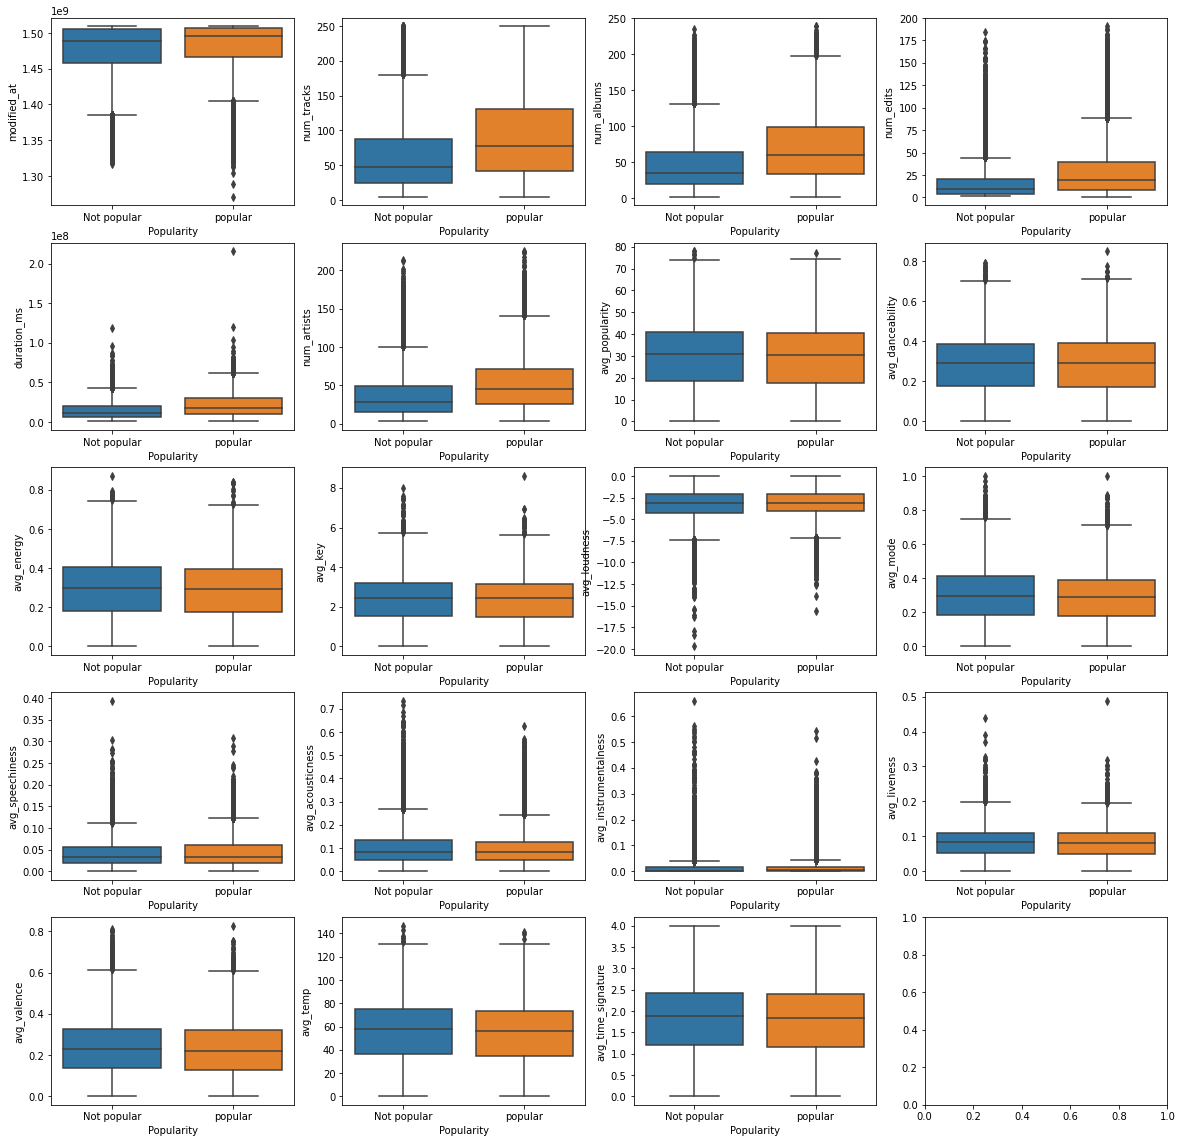

In [ ]:
fig, axs = plt.subplots(5,4,figsize=(20,20))
axs = axs.ravel()
for i, x in enumerate(quant):

      sns.boxplot(data=X_train,x=y_train,y=x,ax=axs[i])
      x_ticks = [0,1]
      x_labels = ['Not popular', 'popular']
      axs[i].set_xlabel('Popularity')
      axs[i].set_xticks(x_ticks)
      axs[i].set_xticklabels(x_labels)


## Baseline model

In [46]:
# result saving
scores = []
aucs_train = {}
aucs_test = {}
models = []

In [47]:
# go with this one
from sklearn.linear_model import LogisticRegression
baseModel = LogisticRegression()
baseModel.fit(X_train, y_train)
y_proba_train_bm = baseModel.predict_proba(X_train)[:, 1]
auc_train = np.round(roc_auc_score(y_train, y_proba_train_bm),3)
y_proba_test_bm = baseModel.predict_proba(X_test)[:, 1]
auc_test = np.round(roc_auc_score(y_test, y_proba_test_bm),3)
print(f"The train auc of our Baseline Model is {auc_train}")
print(f"The test auc of our Baseline Model is {auc_test}")
aucs_train['Base Model'] = auc_train
aucs_test['Base Model'] = auc_test


The train auc of our Baseline Model is 0.649
The test auc of our Baseline Model is 0.665


##Modeling--Lasso CV (main)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Code to standardize the data

# collab_train = 1*(X_train['collaborative'])
# collab_test = 1*(X_test['collaborative'])

# predictors_to_scale = ['modified_at', 'num_tracks', 'num_albums', 'num_edits', 'duration_ms', 
#              'num_artists', 'avg_popularity', 'avg_duration', 'avg_danceability', 'avg_energy',
#              'avg_loudness', 'avg_danceability', 'avg_energy', 'avg_instrumentalness', 
#              'avg_liveness', 'avg_valence', 'avg_temp', 'avg_time_signature']

# X_train = train_data[predictors_to_scale]
# X_test = test_data[predictors_to_scale]

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_std = pd.DataFrame(X_train_scaled, columns = predictors_to_scale)
# X_test_std = pd.DataFrame(X_test_scaled, columns = predictors_to_scale)

# X_train_std['collaborative'] = collab_train
# X_test_std['collaborative'] = collab_test


In [ ]:
# Import standardized data
X_train_std = pd.read_csv('/content/drive/Shareddrives/AC209A-Project/X_train_std.csv')
y_train_lr = pd.read_csv('/content/drive/Shareddrives/AC209A-Project/y_train_lr.csv', header = None)
y_test_lr = pd.read_csv('/content/drive/Shareddrives/AC209A-Project/y_test_lr.csv', header = None)
X_test_std = pd.read_csv('/content/drive/Shareddrives/AC209A-Project/X_test_std.csv')

In [ ]:
lasso_clf = LogisticRegressionCV(random_state=0, penalty = 'l1', solver = 'liblinear')
lasso_clf.fit(X_train_std, y_train_lr)
y_preds = lasso_clf.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
acc_lr = lasso_clf.score(X_test_std, y_test_lr)
print(f"The accuracy on the test set is {acc_lr}")

The accuracy on the test set is 0.7051903807615231


In [40]:
predictors_lr = X_train_std.columns
predictors_lr

Index(['modified_at', 'num_tracks', 'num_albums', 'num_edits', 'duration_ms',
       'num_artists', 'avg_popularity', 'avg_duration', 'avg_danceability',
       'avg_energy', 'avg_loudness', 'avg_danceability.1', 'avg_energy.1',
       'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_temp',
       'avg_time_signature', 'collaborative'],
      dtype='object')

In [41]:
print(f'There are {len(np.where(lasso_clf.coef_ == 0)[0])} coefficients in the Lasso Regression that are equal to zero')

There are 0 coefficients in the Lasso Regression that are equal to zero


In [42]:
print(f"The predictors that are the least useful to make the predictions are {predictors_lr[np.where(np.abs(lasso_clf.coef_)<0.1)[1]]}") 


The predictors that are the least useful to make the predictions are Index(['modified_at', 'avg_loudness', 'avg_liveness'], dtype='object')


In [44]:
most_imp = predictors_lr[int(np.where(lasso_clf.coef_ ==np.max(lasso_clf.coef_))[1])]
print(f"The most useful predictor for the Logistic Regression is {most_imp}")

The most useful predictor for the Logistic Regression is num_edits


In [50]:
y_proba_train_lasso = lasso_clf.predict_proba(X_train_std)[:,1]
y_proba_test_lasso = lasso_clf.predict_proba(X_test_std)[:,1]
auc_train_lasso = np.round(roc_auc_score(y_train_lr, y_proba_train_lasso),3)
print(f'Lasso Logistic Reg AUC on train set:{auc_train_lasso}')
auc_test_lasso = np.round(roc_auc_score(y_test_lr, y_proba_test_lasso),3)
print(f'Lasso Logistic Reg AUC on test set:{auc_test_lasso}')

aucs_train['Lasso Logistic Regression'] = auc_train_lasso 
aucs_test['Lasso Logistic Regression'] = auc_test_lasso

Lasso Logistic Reg AUC on train set:0.676
Lasso Logistic Reg AUC on test set:0.677


##Modeling--Random Forest

In [ ]:
# 10 minutes to run
# hyperparameter 1: number of trees per random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]   
rf1 = RandomForestClassifier(n_jobs=-1,
                               oob_score=True,max_features = 'sqrt')
# hyperparameter 2: maximum depth of trees in random forest
max_depth = [i for i in range(20,101,10)]
params = {'max_depth':max_depth, 'n_estimators' : n_estimators}
scoring = {'AUC': 'roc_auc'}
    
grid_search = GridSearchCV(rf1, params, 
                           scoring=scoring, 
                           refit='AUC',  
                           n_jobs=-1)

results = grid_search.fit(X_train, y_train)
print(results.best_estimator_.get_params())
best_rf = results.best_estimator_

y_proba_train = best_rf.predict_proba(X_train)[:, 1]
y_proba_test = best_rf.predict_proba(X_test)[:, 1]

In [49]:
n_estimators = 230
max_depth = 80
min_samples_split = 2   
rf = RandomForestClassifier(n_jobs=-1,
                               oob_score=True,max_features = 'sqrt', n_estimators = n_estimators,
                            max_depth = max_depth, min_samples_split = min_samples_split).fit(X_train, y_train)

y_proba_train_rf = rf.predict_proba(X_train)[:, 1]
y_proba_test_rf = rf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [52]:
# Calculate AUC/ROC
# y_proba_train_rf = pd.read_csv(r'drive/Shareddrives/AC209A-Project/y_proba_train_rf.csv')
auc_train = np.round(roc_auc_score(y_train, y_proba_train_rf),3)
print(f'GridSearchCV RF AUC on train set:{auc_train}')
# y_proba_test_rf =  pd.read_csv(r'drive/Shareddrives/AC209A-Project/y_proba_test_rf.csv')
auc_test = np.round(roc_auc_score(y_test, y_proba_test_rf),3)
print(f'GridSearchCV RF AUC on test set:{auc_test}')

aucs_train['Random Forest'] = auc_train 
aucs_test['Random Forest'] = auc_test

GridSearchCV RF AUC on train set:1.0
GridSearchCV RF AUC on test set:0.682


## Modeling--Ada Boosting

In [53]:
base_model = DecisionTreeClassifier(max_depth=3,class_weight='balanced')
ada = AdaBoostClassifier(base_model,n_estimators=500,learning_rate=0.05)
ada.fit(X_train,y_train)
iters = [i for i in range(1,501)]
tr_gen = ada.staged_predict_proba(X_train)
te_gen = ada.staged_predict_proba(X_test)
tr_scores  = [roc_auc_score(y_train,i[:,1]) for i in tr_gen]
te_scores  = [roc_auc_score(y_test,i[:,1]) for i in te_gen]


In [54]:
y_proba_test_ab = ada.predict_proba(X_test)[:,1]

In [55]:
auc_test_ab = np.round(max(te_scores), 3)
idx = te_scores.index(max(te_scores))
auc_train_ab = np.round(tr_scores[idx], 3)
print(f'AB AUC on train set:{auc_train_ab}')
print(f'AB AUC on test set:{auc_test_ab}')

aucs_train['Ada Boosting'] = auc_train_ab 
aucs_test['Ada Boosting'] = auc_test_ab

AB AUC on train set:0.695
AB AUC on test set:0.69


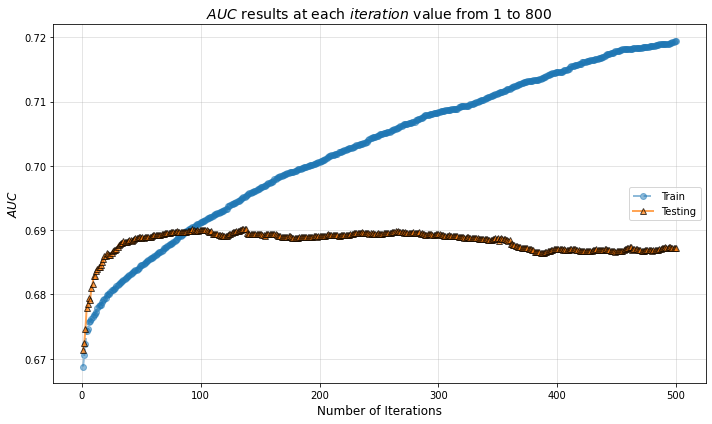

In [65]:
# graph
fig,ax = plt.subplots(1,1,figsize = (10,6))
ax.plot(iters, tr_scores, "o--", label="Train", linewidth=2, alpha=0.5)
ax.plot(iters, te_scores, "^-", label="Testing", linewidth=2, markeredgecolor="k", alpha=0.7)

ax.set_xlabel("Number of Iterations", fontsize=12)
ax.set_ylabel("$AUC$", fontsize=12)
ax.set_title(
    r"$AUC$ results at each $iteration$ value from 1 to 800",
    fontsize=14)
ax.legend(fontsize=10, loc=5)
ax.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()


##TSNE

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random',random_state=44).fit_transform(X_train)

In [ ]:
viz = X_train.copy()
viz['dim_1'] = X_embedded[:,0]
viz['dim_2'] = X_embedded[:,1]
viz['popular'] = y_train

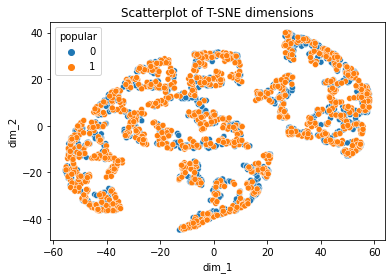

In [ ]:
import seaborn as sns
plt.title("Scatterplot of T-SNE dimensions")
sns.scatterplot(x='dim_1',y='dim_2',hue='popular',data = viz)

In [ ]:
X_embedded_train = TSNE(n_components=2, learning_rate='auto',init='random',random_state=44).fit_transform(X_train[['avg_popularity', 'avg_danceability',
       'avg_energy', 'avg_key', 'avg_loudness', 'avg_mode', 'avg_speechiness',
       'avg_acousticness', 'avg_instrumentalness', 'avg_liveness',
       'avg_valence', 'avg_temp', 'avg_time_signature']])
X_embedded_test = TSNE(n_components=2, learning_rate='auto',init='random',random_state=44).fit_transform(X_test[['avg_popularity', 'avg_danceability',
       'avg_energy', 'avg_key', 'avg_loudness', 'avg_mode', 'avg_speechiness',
       'avg_acousticness', 'avg_instrumentalness', 'avg_liveness',
       'avg_valence', 'avg_temp', 'avg_time_signature']])

In [ ]:
viz_train = X_train.copy()
viz_train['dim_1'] = X_embedded_train[:,0]
viz_train['dim_2'] = X_embedded_train[:,1]
viz_train['popular'] = y_train

viz_test = X_test.copy()
viz_test['dim_1'] = X_embedded_test[:,0]
viz_test['dim_2'] = X_embedded_test[:,1]

In [ ]:
plt.figure(figsize=(12,12))
plt.title("Scatterplot of T-SNE dimensions")
sns.scatterplot(x='dim_1',y='dim_2',hue='popular',data = viz)

In [ ]:
viz_train = viz_train.drop(['popular'],axis=1)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]   
rf1 = RandomForestClassifier(n_jobs=-1,
                               oob_score=True,max_features = 'sqrt')
# hyperparameter 2: maximum depth of trees in random forest
max_depth = [i for i in range(20,101,10)]
params = {'max_depth':max_depth, 'n_estimators' : n_estimators}
scoring = {'AUC': 'roc_auc'}
    
grid_search = GridSearchCV(rf1, params, 
                           scoring=scoring, 
                           refit='AUC',  
                           n_jobs=-1)

results = grid_search.fit(viz_train[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']], y_train)
print(results.best_estimator_.get_params())
best_rf = results.best_estimator_

In [ ]:
rf2 = RandomForestClassifier(n_jobs=-1,oob_score=True,max_depth=90,min_samples_split=2,n_estimators=282,max_features = 'sqrt')
rf2.fit(viz_train[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']], y_train)
y_proba_train = rf2.predict_proba(viz_train[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']])[:, 1]
y_proba_test = rf2.predict_proba(viz_test[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']])[:, 1]

In [ ]:
auc_train = np.round(roc_auc_score(y_train, y_proba_train),2)
print(f'GridSearchCV RF AUC on train set:{auc_train}')
auc_test = np.round(roc_auc_score(y_test, y_proba_test),2)

aucs_train['Random Forest TSNE'] = auc_train 
aucs_test['Random Forest TSNE'] = auc_test

In [ ]:
base_model = DecisionTreeClassifier(max_depth=3,class_weight='balanced')
ada = AdaBoostClassifier(base_model,n_estimators=500,learning_rate=0.05)
ada.fit(viz_train[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']], y_train)
iters = [i for i in range(1,501)]
tr_gen = ada.staged_predict_proba(viz_train[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']])
te_gen = ada.staged_predict_proba(viz_test[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']])
tr_scores  = [roc_auc_score(y_train,i[:,1]) for i in tr_gen]
te_scores  = [roc_auc_score(y_test,i[:,1]) for i in te_gen]

In [ ]:
y_proba_train_ab = ada.predict_proba(viz_train[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']])[:,1]
auc_train_ab = np.round(roc_auc_score(y_train, y_proba_train_ab),2)
print(f'AB AUC on train set:{auc_train_ab}')
y_proba_test_ab =  ada.predict_proba(viz_test[['collaborative', 'modified_at', 'num_tracks', 'num_albums', 'num_edits',
       'duration_ms', 'num_artists','dim_1','dim_2']])[:,1]
auc_test_ab = np.round(roc_auc_score(y_test, y_proba_test_ab),2)
print(f'AB AUC on test set:{auc_test_ab}')

aucs_train['Ada Boost TSNE'] = auc_train 
aucs_test['Ada Boost TSNE'] = auc_test

## Evaluation-ROC - AUC

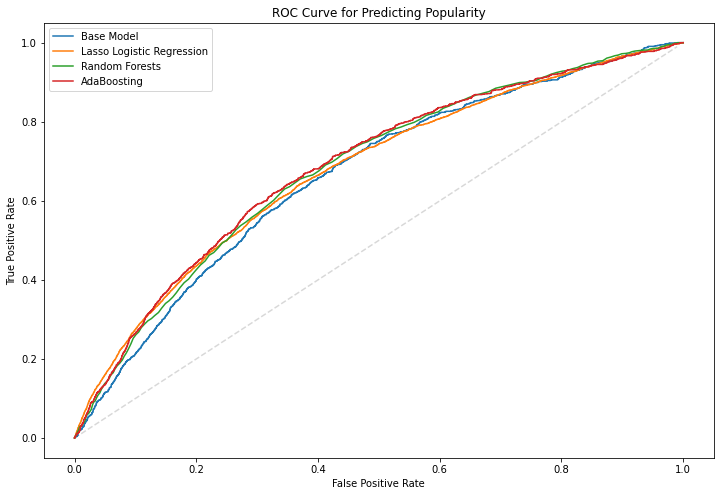

In [58]:
from sklearn.metrics import roc_curve

y_proba_test_bm
y_proba_test_lasso
y_proba_test_rf
y_proba_test_ab


fpr_bm, tpr_bm, thresh_bm = roc_curve(y_test, y_proba_test_bm)
fpr_lasso, tpr_lasso, thresh_lasso = roc_curve(y_test_lr, y_proba_test_lasso)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_proba_test_rf)
fpr_ab, tpr_ab, thresh_ab = roc_curve(y_test, y_proba_test_ab)

x=np.arange(0,100)/100
plt.figure(figsize = (12,8))
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr_bm, tpr_bm,label="Base Model")
plt.plot(fpr_lasso, tpr_lasso,label="Lasso Logistic Regression")
plt.plot(fpr_rf, tpr_rf,label="Random Forests")
plt.plot(fpr_ab, tpr_ab ,label="AdaBoosting")

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting Popularity")
plt.legend()
plt.show()

In [62]:
final_results_train = pd.DataFrame.from_dict(aucs_train, orient='index')
final_results_train = final_results_train.rename(columns={0: "Train AUC"})
final_results_test = pd.DataFrame.from_dict(aucs_test, orient='index')
final_results_test = final_results_test.rename(columns={0: "Test AUC"})

In [63]:
final_results = pd.concat([final_results_train, final_results_test], axis=1)

In [64]:
display(final_results)

,Train AUC,Test AUC
Base Model,0.649,0.665
Lasso Logistic Regression,0.676,0.677
Random Forest,1.000,0.682
Ada Boosting,0.695,0.690
